# Παραδοτέο

## Ερώτημα α

Παρατηρούμε ότι στα plots δεν είναι εμφανής κάποια ποιοτική διαφορά σημαντική. Καταγράψαμε και τον μέσο όρο (μαγνήτιση) των μετρήσεων, και βλέπουμε ότι εκεί, για τα διαφορετικά iterations, υπάρχει αρκετά μεγάλη διαφορά, η οποία όμως δεν αποτυπώνεται στο συνολικό διάγραμμα. 
Όπως βλέπουμε, ο αριθμός των spins που αλλάζουν τιμή από την αρχική τους συνολικά, δε φαίνεται να άλλαξε πολύ, για αυτό δεν βλέπουμε κάποια σημαντική αλλαγή στα plots. 

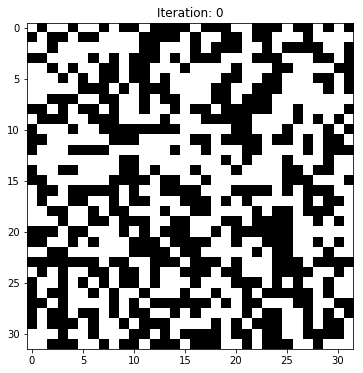

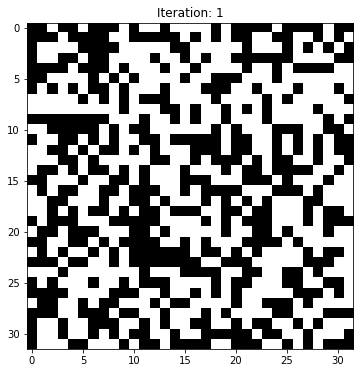

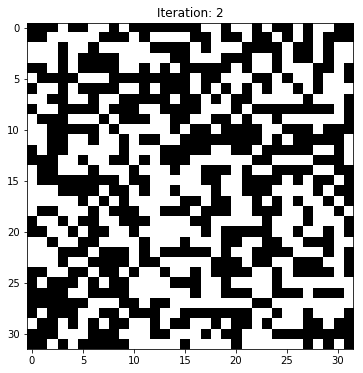

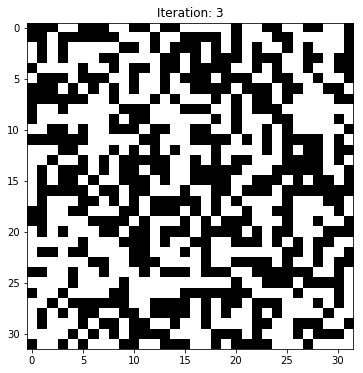

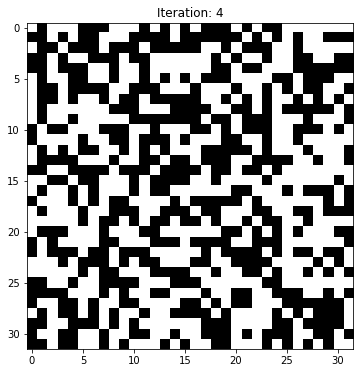

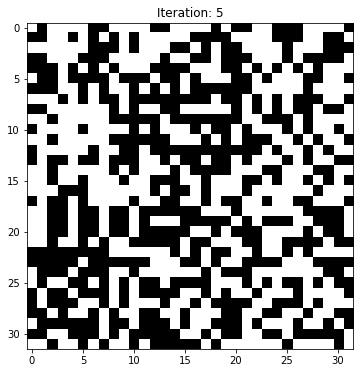

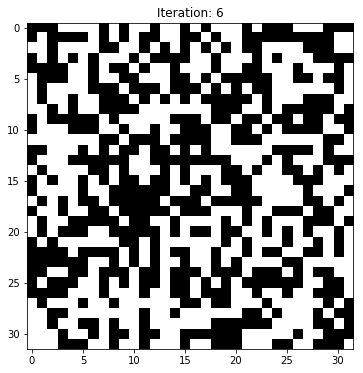

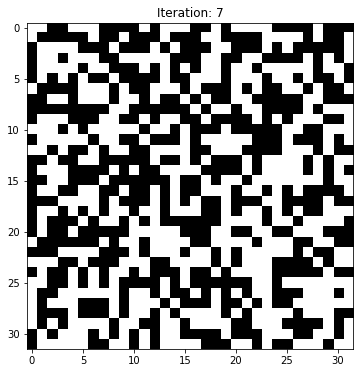

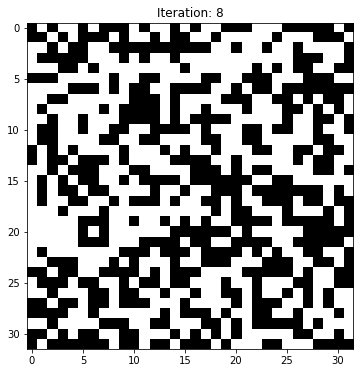

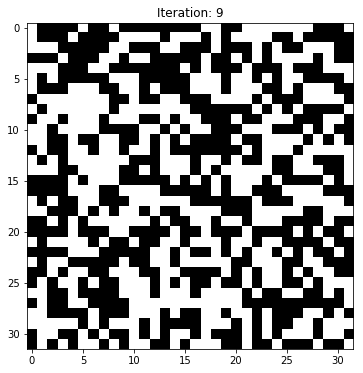

Recorded average value on spins array for each iteration. Results are shown below 

[-0.046875, -0.060546875, 0.021484375, -0.0234375, -0.02734375, -0.015625, -0.00390625, -0.001953125, -0.044921875, 0.017578125]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)  # increase default figure size

np.random.seed(2016)  # for reproducibility

def Ising(spins_init, Temp, nsteps=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
    
    return spins

avgs = []

for i in range(10):
    spins_init = np.ones((32,32), dtype=np.int)
    result = Ising(spins_init, 30.)
    summy = sum(map(sum, result))
    m = summy / 1024
    avgs.append(m)
    plt.imshow(result, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Iteration: %d" % i)
    plt.show()
    
print ("Recorded average value on spins array for each iteration. Results are shown below \n")
print (avgs)

## Ερωτήματα β-γ

Παρατηρούμε ότι η μείωση της θερμοκρασίας έχει ως αποτέλεσμα όλο και περισσότερες τιμές των spin να παραμένουν στην τιμή +1. Αυτό συμβαίνει καθώς όσο αυξάνεται η ενέργεια, τόσο μειώνεται η πιθανότητα αλλαγής της τιμής του spin, όπως ειπώθηκε και στην εκφώνηση της άσκησης. Επομένως, οι αλλαγές είναι πολύ πιο δύσκολες για μεγαλύτερες θερμοκρασίες, και φτάνουν στην τιμή 0.01 όπου όλο το plot είναι ουσιαστικά μαύρο, που σημαίνει ότι όλα τα spin έχουν παραμείνει στην τιμή +1, χωρίς να έχουν αλλάξει, αφού η πιθανότητα είναι πολύ μικρή. 

Φαίνεται πως η τιμή της μαγνήτισης, δηλαδή ο μέσος όρος των τιμών των spins αυξάνεται όσο μειώνεται η θερμοκρασία. Κάτι τέτοιο είναι αναμενόμενο, με βάση την παραπάνω επεξήγηση. Αυτό σημαίνει ότι οι τιμές των spins για μικρές θερμοκρασίες μεταβάλλονται με μικρή πιθανότητα από την αρχικοποιημένη +1, άρα μένουν στη μεγαλύτερη δυνατή τιμή (δηλ.+1 όλα τα spins). Για αυτό άλλωστε για πολύ μικρές θερμοκρασίες, η τιμή της μαγνήτισης είναι ακριβώς 1.  


Showing new plots corresponding to different temperature settings


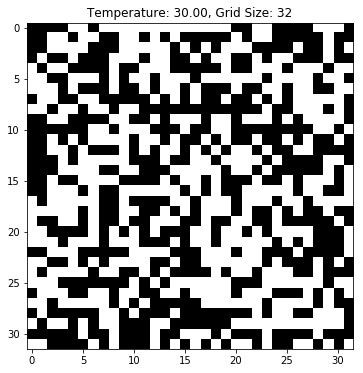

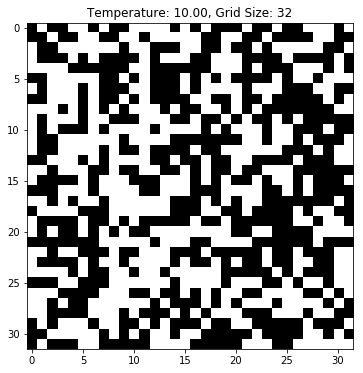

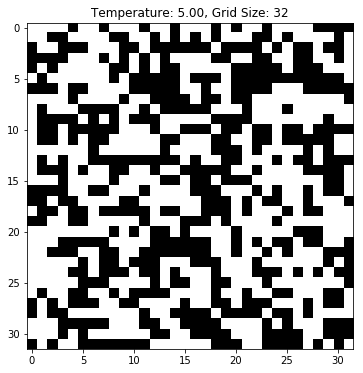

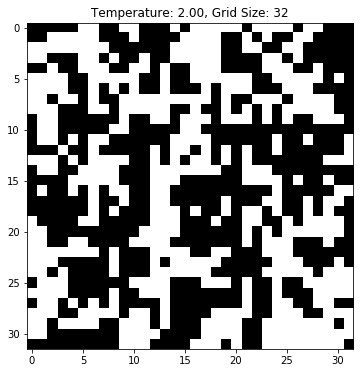

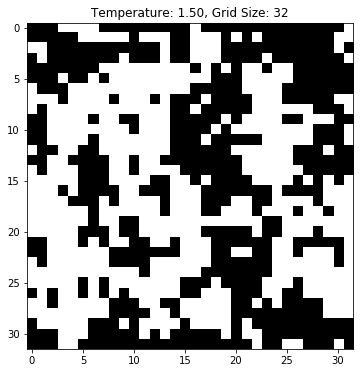

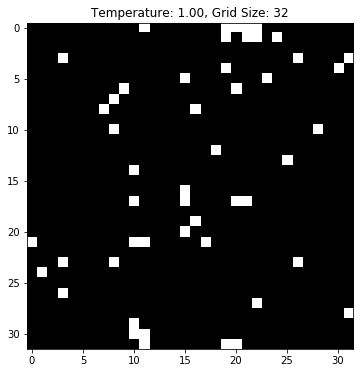

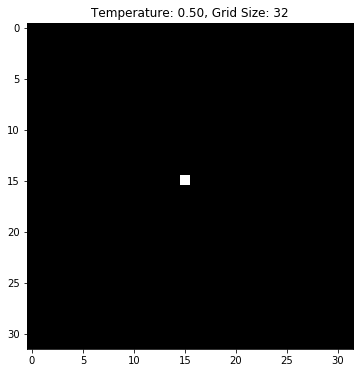

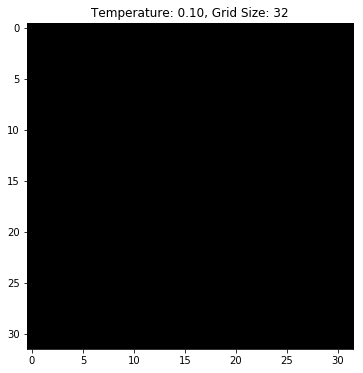

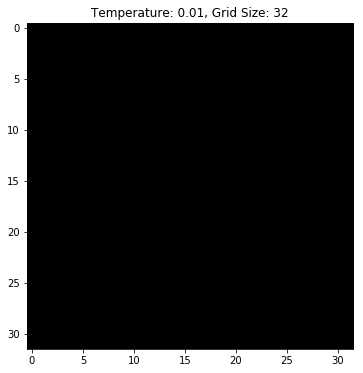

[-0.01171875, 0.021484375, -0.0625, 0.0546875, -0.03515625, 0.90234375, 0.998046875, 1.0, 1.0]


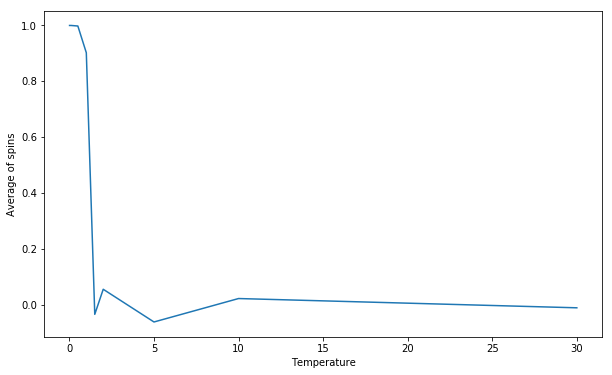

In [2]:
print("Showing new plots corresponding to different temperature settings")
T = [30., 10., 5., 2., 1.5, 1., 0.5, 0.1, 0.01]
y = [] 
x = []

for i in range(9):
    t = T[i]
    x.append(t)
    spins_init = np.full((32,32), +1, dtype=int)
    result = Ising(spins_init, t)
    summy = sum(map(sum, result))
    m = summy / 1024
    y.append(m)
    plt.imshow(result, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.2f, Grid Size: %d" % (t, 32))
    plt.show()
  
print (y)

plt.plot(x, y)
plt.xlabel("Temperature")
plt.ylabel("Average of spins")
plt.show()

## Ερώτημα δ

Τρέξαμε το παρακάτω τμήμα κώδικα για την τιμή $Τ = 0.1$, για τις διάφορες τιμές του nsteps. Όμως, σε όλα τα plots πήραμε την ίδια εικόνα ακριβώς, που είναι όλο μαύρο το plot, γεγονός που σημαίνει ότι ήδη από μικρό αριθμό των steps, οι τιμές των spin δεν αλλάζουν, για τόσο μικρή θερμοκρασία δηλαδή η πιθανότητα είναι πολύ μικρή σε όλες τις επαναλήψεις. 

Για να είναι πιο εμφανής η αλλαγή, τρέξαμε τον αλγόριθμο για $Τ = 1.0$. Στο διάγραμμα φαίνεται ότι για τις πρώτες επαναλήψεις παραμένουν τα spins στην τιμή +1, ενώ όσο αυξάνουμε τα steps, η μικρή αυτή πιθανότητα αλλαγής πραγματοποιείται, οπότε ορισμένα (λίγα φυσικά) spins αλλάζουν τιμή και πηγαίνουν στο -1. Ο αριθμός των spins που αλλάζουν αυξάνεται αργά με τον αριθμό των steps σταδιακά. 

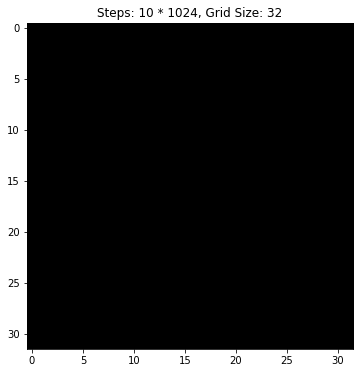

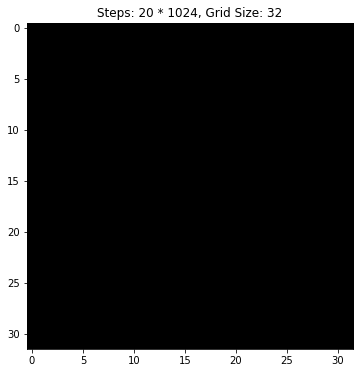

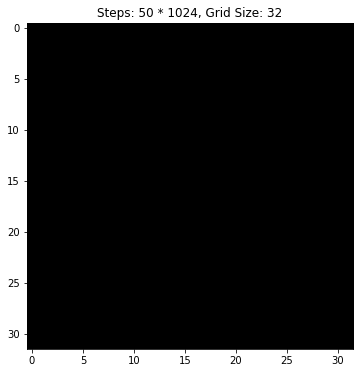

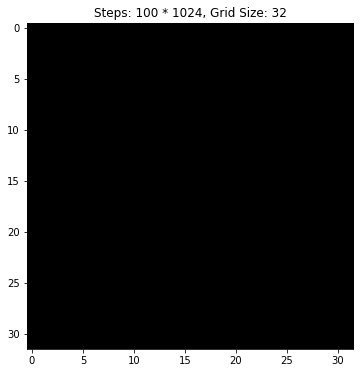

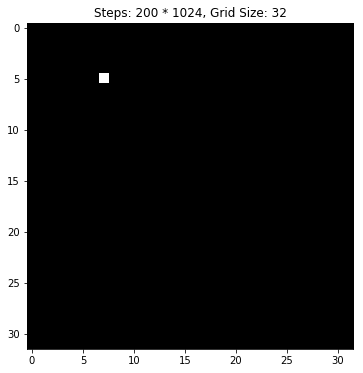

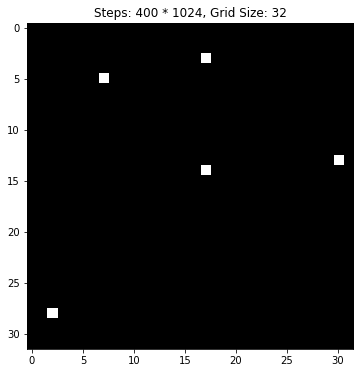

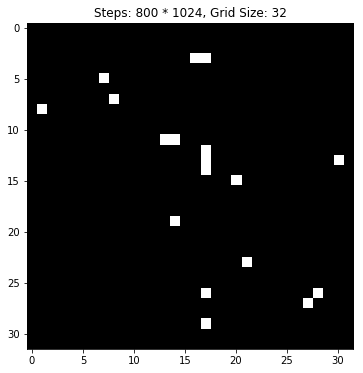

In [7]:
ns = [10,20,50,100,200,400,800]
plt.rcParams["figure.figsize"] = (10, 6)  # increase default figure size
 

def Ising(spins_init, Temp, nsteps=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    i = 0
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
        if ((i < 7) and (n == ns[i])):
            i += 1
            plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
            plt.title("Steps: %d * 1024, Grid Size: %d" % (n, 32))
            plt.show()
            
    
    return spins

spins_init = np.full((32,32), +1, dtype=int)
result = Ising(spins_init, 1.)